In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv(r'/content/train_ctrUa4K.csv')
test = pd.read_csv(r'/content/test_lAUu6dG.csv')
train_original = train.copy()
test_original = test.copy()

In [7]:
train.shape

(614, 13)

In [8]:
train.shape

(614, 13)

In [9]:
train.shape

(614, 13)

In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


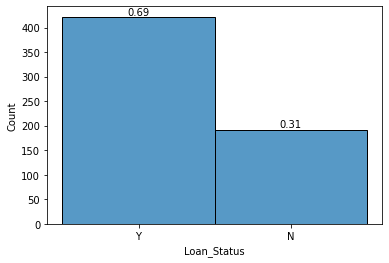

In [17]:
ax = sns.histplot(train['Loan_Status'])
ax.bar_label(ax.containers[1], labels = np.round_(train['Loan_Status'].value_counts()/train['Loan_Status'].size, decimals = 2))
plt.show()

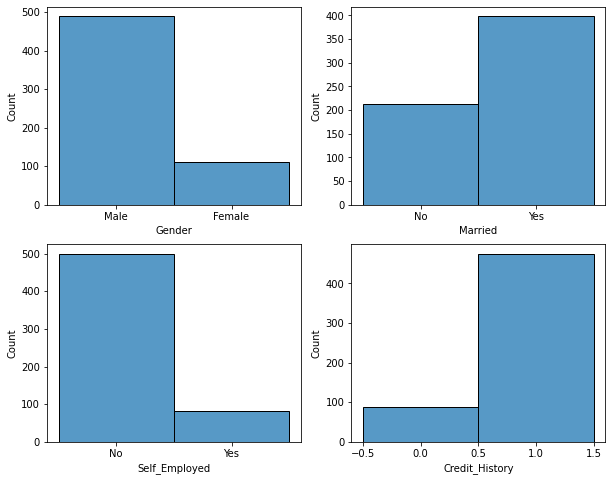

In [18]:
fig, axes = plt.subplots(2,2, figsize = (10,8))
sns.histplot(train['Gender'], ax = axes[0,0])
sns.histplot(train['Married'], ax = axes[0,1])
sns.histplot(train['Self_Employed'], ax = axes[1,0])
sns.histplot(train['Credit_History'], discrete = True, ax = axes[1,1])
plt.show()

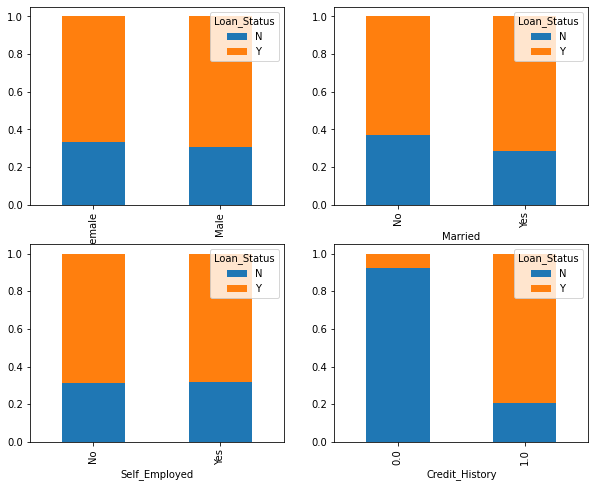

In [19]:
fig, axes = plt.subplots(2,2, figsize = (10,8))
gender = train.groupby('Gender')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
gender.plot(kind = 'bar', stacked = True, ax = axes[0,0])
married = train.groupby('Married')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
married.plot(kind = 'bar', stacked = True, ax = axes[0,1])
emp = train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
emp.plot(kind = 'bar', stacked = True, ax = axes[1,0])
cred = train.groupby('Credit_History')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
cred.plot(kind = 'bar', stacked = True, ax = axes[1,1])
plt.show()

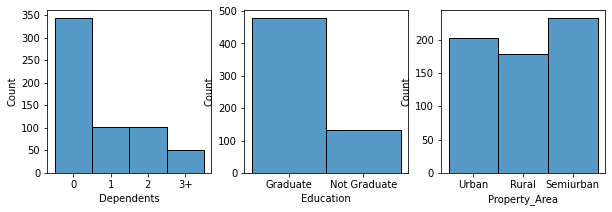

In [20]:
fig, axes = plt.subplots(1,3,figsize = (10,3))
sns.histplot(train['Dependents'], discrete = True, ax = axes[0])
sns.histplot(train['Education'], ax = axes[1])
sns.histplot(train['Property_Area'], ax = axes[2])
plt.show()
     

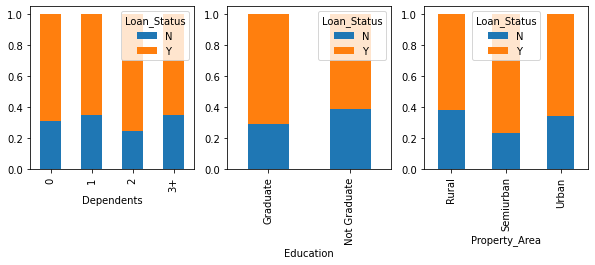

In [21]:
fig, axes = plt.subplots(1,3,figsize = (10,3))
dependents = train.groupby('Dependents')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
dependents.plot(kind = 'bar', stacked = True, ax = axes[0])
edu = train.groupby('Education')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
edu.plot(kind = 'bar', stacked = True, ax = axes[1])
prop = train.groupby('Property_Area')['Loan_Status'].value_counts(normalize = True).unstack('Loan_Status')
prop.plot(kind = 'bar', stacked = True, ax = axes[2])
plt.show()

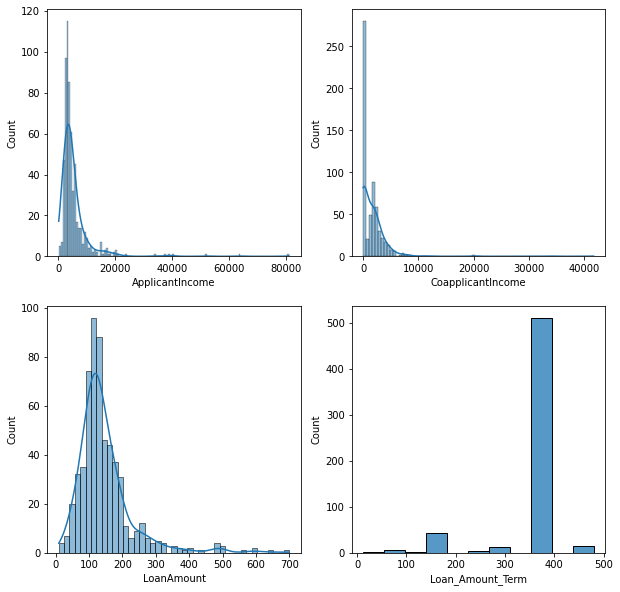

In [22]:
fig, axes = plt.subplots(2,2,figsize = (10,10))
sns.histplot(train['ApplicantIncome'], kde = True, ax = axes[0,0])
sns.histplot(train['CoapplicantIncome'], kde = True, ax = axes[0,1])
sns.histplot(train['LoanAmount'], kde = True, ax = axes[1,0])
sns.histplot(train['Loan_Amount_Term'], ax = axes[1,1])
plt.show()

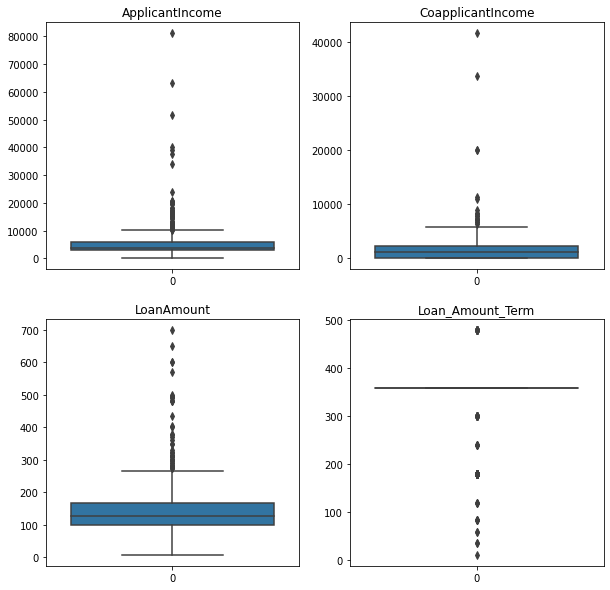

In [23]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
sns.boxplot(train['ApplicantIncome'], ax = axes[0,0]).set_title('ApplicantIncome')
sns.boxplot(train['CoapplicantIncome'], ax = axes[0,1]).set_title('CoapplicantIncome')
sns.boxplot(train['LoanAmount'], ax = axes[1,0]).set_title('LoanAmount')
sns.boxplot(train['Loan_Amount_Term'], ax = axes[1,1]).set_title('Loan_Amount_Term')
plt.show()
     

In [25]:
train.groupby('Loan_Status')[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].mean()
     

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,5446.078125,1877.807292,151.220994,344.064516
Y,5384.068720,1504.516398,144.294404,341.072464


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

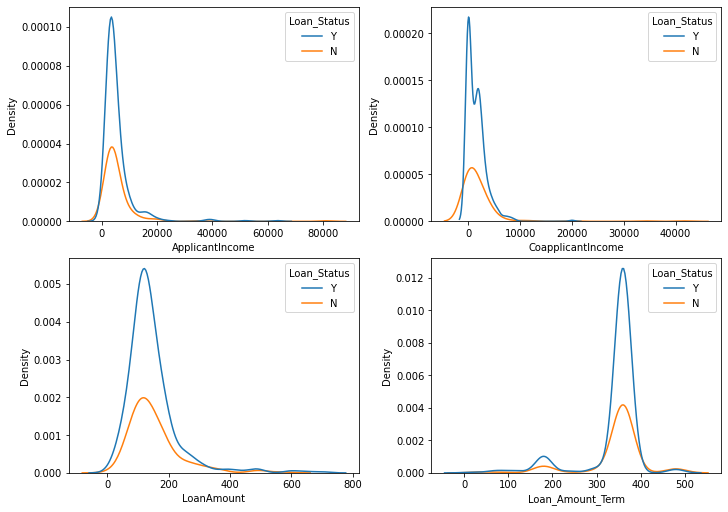

In [26]:
fig, axes = plt.subplots(2,2, constrained_layout = True, figsize = (10,7))

sns.kdeplot(data = train, x = train['ApplicantIncome'], hue = 'Loan_Status', ax = axes[0,0])
sns.kdeplot(data = train, x = train['CoapplicantIncome'], hue = 'Loan_Status', ax = axes[0,1])
sns.kdeplot(data = train, x = train['LoanAmount'], hue = 'Loan_Status', ax = axes[1,0])
sns.kdeplot(data = train, x = train['Loan_Amount_Term'], hue = 'Loan_Status', ax = axes[1,1])


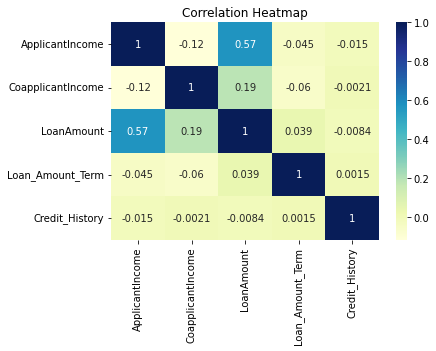

In [27]:
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [28]:
train['Dependents'].replace('3+', 3, inplace = True)
train['Dependents'] = train['Dependents'].astype('float')
test['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'] = test['Dependents'].astype('float')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [30]:
train.isnull().sum()
     

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)
     

In [36]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
     

In [38]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

ENCODING

In [39]:
train.drop('Loan_ID', axis = 1, inplace = True)
test.drop('Loan_ID', axis = 1, inplace = True)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
test['Gender'] = le.transform(test['Gender'])
train['Married'] = le.fit_transform(train['Married'])
test['Married'] = le.transform(test['Married'])
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
test['Self_Employed'] = le.transform(test['Self_Employed'])
train['Education'] = le.fit_transform(train['Education'])
test['Education'] = le.transform(test['Education'])
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [43]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
     

In [44]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [45]:
train.drop('Property_Area_Urban', axis = 1, inplace = True)
test.drop('Property_Area_Urban', axis = 1, inplace = True)
   

In [46]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0


In [47]:
X = train.drop('Loan_Status', axis = 1)
y = train['Loan_Status']

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

LOGISTIC REGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(C = 0.01)
skfold = StratifiedKFold(n_splits = 10)
cv_score = cross_val_score(lr, X_train, y_train, cv = skfold)
print(cv_score)
print(np.mean(cv_score))

[0.84782609 0.84782609 0.76086957 0.82608696 0.89130435 0.7826087
 0.69565217 0.84782609 0.80434783 0.80434783]
0.8108695652173914


In [51]:
from sklearn.metrics import accuracy_score
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(accuracy_score(y_val, y_pred))

0.7727272727272727


DECISION TREE

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_score = cross_val_score(dt, X_train, y_train, cv = skfold)
print(cv_score)
print(np.mean(cv_score))

[0.86956522 0.7173913  0.7173913  0.65217391 0.65217391 0.67391304
 0.65217391 0.73913043 0.73913043 0.69565217]
0.7108695652173912


RFA-RANDOM FOREST

In [53]:
np.linspace(10, 1000, 10)

array([  10.,  120.,  230.,  340.,  450.,  560.,  670.,  780.,  890.,
       1000.])

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, criterion = 'entropy', min_samples_split = 4, min_samples_leaf = 6, n_estimators = 67, max_features = 'sqrt')
cv_score = cross_val_score(rf, X_train, y_train, cv = skfold)
print(cv_score)
print(np.mean(cv_score))

[0.89130435 0.84782609 0.7826087  0.84782609 0.89130435 0.7826087
 0.69565217 0.84782609 0.80434783 0.7826087 ]
0.8173913043478261


In [55]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
accuracy_score(y_val, y_pred)
     

0.7727272727272727

KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv_score = cross_val_score(knn, X_train, y_train, cv = skfold)
print(cv_score)
print(np.mean(cv_score))

[0.86956522 0.82608696 0.73913043 0.84782609 0.80434783 0.67391304
 0.7173913  0.7826087  0.7826087  0.80434783]
0.7847826086956522


In [57]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy_score(y_val, y_pred)

0.7662337662337663

In [58]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
cv_score = cross_val_score(svc, X_train, y_train, cv = skfold)
print(cv_score)
print(np.mean(cv_score))

[0.89130435 0.84782609 0.7826087  0.84782609 0.89130435 0.80434783
 0.69565217 0.84782609 0.80434783 0.80434783]
0.8217391304347826


In [59]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
print(accuracy_score(y_val, y_pred))
     

0.7727272727272727


Logistic Regression, RFA and SVC gives the best value

In [61]:
submission = pd.read_csv(r'/content/sample_submission_49d68Cx.csv')
pred_test = lr.predict(test)
submission['Loan_Status'] = pred_test
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [62]:
submission.to_csv('Logistic.csv', index = False)